# Importing libraries

In [ ]:
from platform import python_version
import pandas as pd
import numpy as np
import os
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

print(python_version())
print(pd.__version__)
print(os.getcwd())

# Reading the dataset, converting date variables to correct format and adding new vars

In [54]:
df = pd.read_csv("D:\personal\Kotak\spain_data.csv")

#convert date variables to datetime format
df['Birth_Date'] = pd.to_datetime(df.Birth_Date,format='%d-%m-%Y')
df['Effecitive_Date'] = pd.to_datetime(df.Effecitive_Date,format='%d-%m-%Y')
df['Renewal_Date'] = pd.to_datetime(df.Renewal_Date,format='%d-%m-%Y')

#Adding monotonic Log and 1/N transformation for Capital variables
df['log_capital'] = np.log(df['Capital']) #Natural log of Capital
df['capital_k']=df['Capital']/1000 #Capital in thousands

df.dtypes

ID                                int64
Gender                           object
Birth_Date               datetime64[ns]
Effecitive_Date          datetime64[ns]
Capital                         float64
Renewal_Date             datetime64[ns]
Age                             float64
t                               float64
Age_Actuarial                     int64
Birthday                         object
x                               float64
r                                 int64
s                                 int64
Age_actuarial_quarter           float64
Month                             int64
dtype: object

# Step1 -Data Understanding

In [11]:
#Univariate analysis of 'Capital','Age','t','Age_Actuarial','x','r','s','Age_actuarial_quarter','Month','log_capital' 
#and exporting to 'UniNum.csv
#Frequency for'Gender'

def means(var,data):

    means = data[var].describe()

    p10 = data[var].quantile(0.1)
    p20 = data[var].quantile(0.2)
    p90 = data[var].quantile(0.9)
    p99 = data[var].quantile(0.99)
    miss = data[var].isnull().sum(axis=0)

    percentile = pd.Series([p10,p20,p90,p99,miss],index=['10%','20%','90%','99%','nmiss'])
    m1 = pd.DataFrame(means).transpose()
    m2 = pd.DataFrame(percentile).transpose()
    m2.index = [var]

    m3 = pd.merge(m1,m2,left_index=True, right_index=True)
    m3['variable'] = m3.index
    m3.columns = ['N','mean','std','min','25%','50%','75%','max','10%','20%','90%','99%','nmiss','variable']
    m3 = m3[["variable","N", "nmiss","mean","std","min","10%","20%","25%","50%","75%","90%","99%","max"]]
    return m3;

def freq(var,data):
    f1 = pd.DataFrame(data[var].value_counts(dropna=False))
    f1.columns = [var]
    f1.index.name = 'value'
    return f1

mean_list = ['Capital','Age','t','Age_Actuarial','x','r','s','Age_actuarial_quarter','Month','log_capital']
i=0
Uni = pd.DataFrame(columns=["variable","N", "nmiss","mean","std","min","10%","20%","25%","50%","75%","90%","99%","max"])

while i < len(mean_list):
    result = means(mean_list[i],df)
    Uni = pd.concat([Uni,result],ignore_index=True)
    i=i+1
    
print(freq('Gender',df))
Uni.to_csv('UniNum.csv',sep=',',header=True,mode='a',index=False)

       Gender
value        
M       47652
F       28450


C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\2601557703.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Uni = pd.concat([Uni,result],ignore_index=True)


# Step2(1) - Distribution,Bucket

0


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


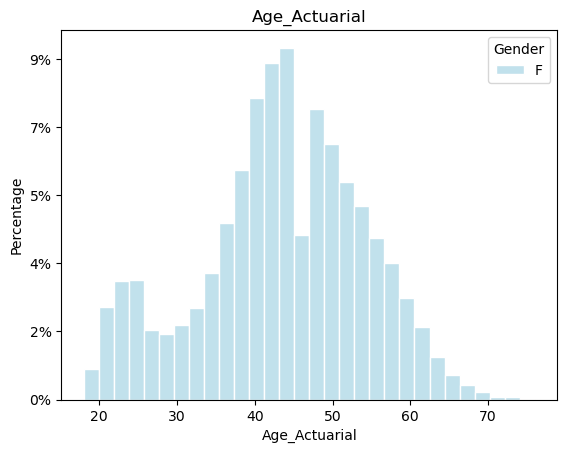

0


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


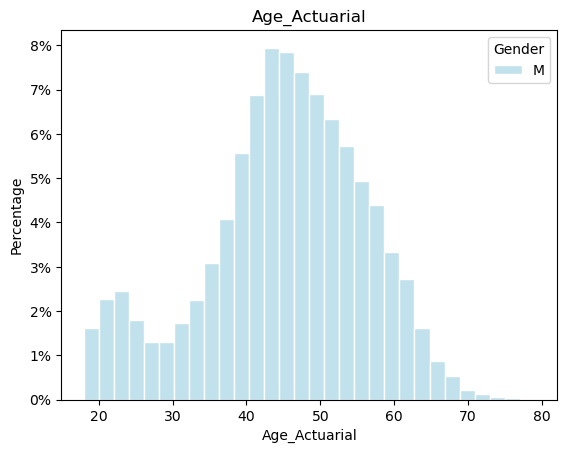

1


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


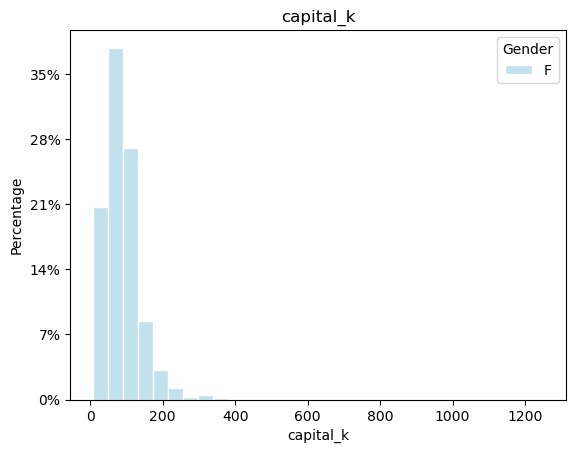

1


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


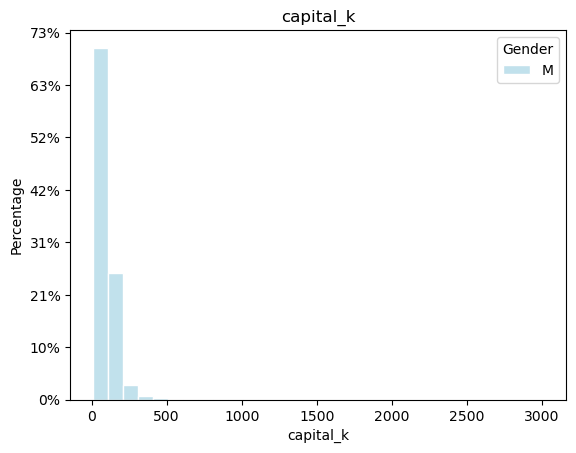

2


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


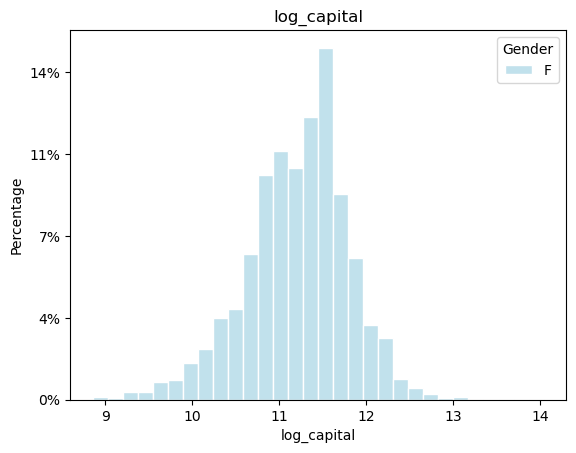

2


C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


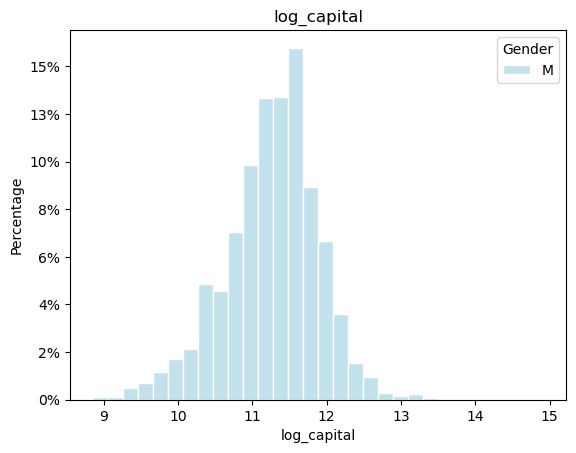

C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


3


C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


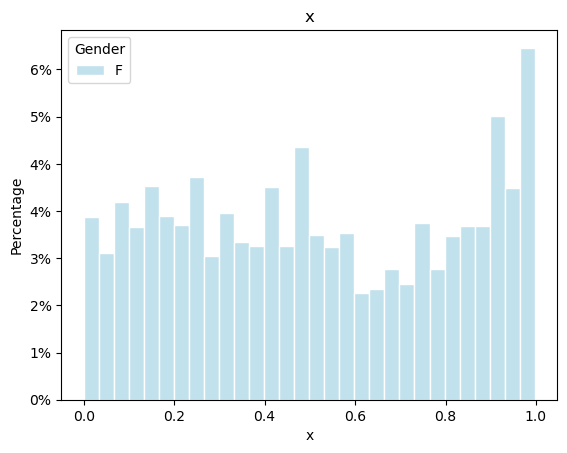

C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


3


C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


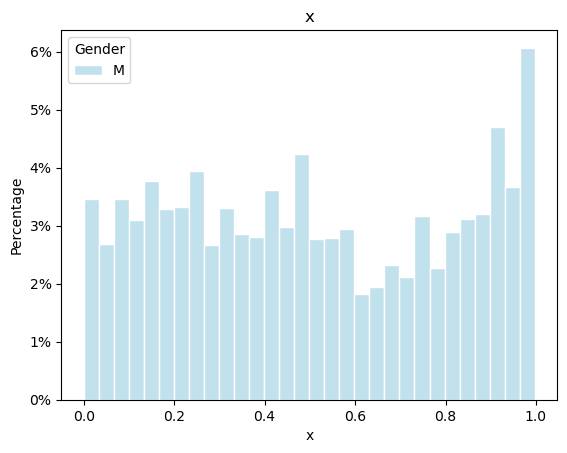

C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


4


C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


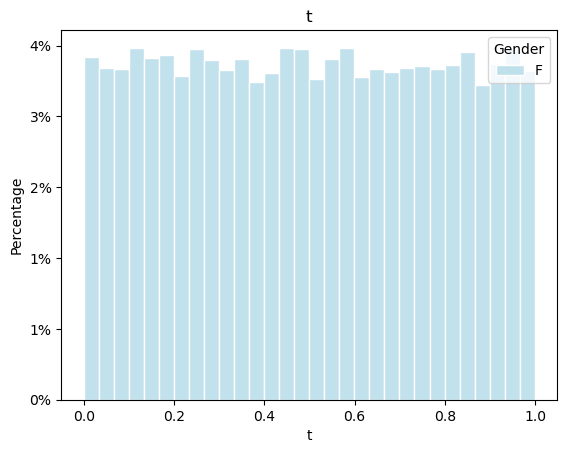

C:\Users\mail2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


4


C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\537187640.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])


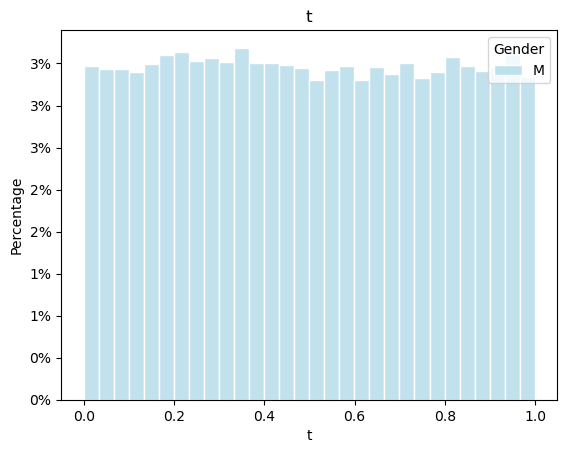

In [31]:
#Basic Histogram plots of 'Age_Actuarial','capital_k','log_capital','x','t'

var = ['Age_Actuarial','capital_k','log_capital','x','t']
i=0
grouped = df.groupby('Gender')
while i < len(var):    
    for gender, group in grouped:
        total_samples = len(group)
        percentages = group[var[i]].value_counts(normalize=True) * 100
        sns.histplot(data=group[var[i]], stat='count',bins=30, label=gender, color='lightblue', edgecolor='white')

        # Adding labels and title
        plt.xlabel(var[i])
        plt.ylabel('Percentage')
        plt.title(var[i])
        plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks() / (total_samples / 100)])
        plt.legend(title='Gender')
        #plt.xticks(range(20, 80, 5))

        print(i)
        # Display the plot
        plt.show()
    i=i+1

# Create bucket for 'Age', 'Capital' and 'x'

In [15]:
# Define the bins for age groups
age_bins = [-float("inf"), 20, 30, 40, 50, 60, 70, float("inf")]  # Define the boundaries for the age groups
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']  # Define labels for the age groups

# Define the bins for Capital
cap_bins = [-float("inf"), 10, 20, 60, 80, 100, 150, float("inf")]  # Define the boundaries for the age groups
cap_labels = ['<10k', '10k-<20k', '20K-<60K', '60K-<80K', '80K-<100K', '100K-<150K', '150K+']  # Define labels for the age groups

# Define the bins for Capital
x_bins = [-float("inf"), 0.2, 0.4, 0.6, 0.8, float("inf")]  # Define the boundaries for the age groups
x_labels = ['<0.2', '0.2-<0.4', '0.4-<0.6', '0.6-<0.8', '0.8+']  # Define labels for the age groups

df['AgeActGroup'] = pd.cut(df['Age_Actuarial'], bins=age_bins, labels=age_labels, right=False)
df['xGroup'] = pd.cut(df['x'], bins=x_bins, labels=x_labels, right=False)
df['CapitalGroup'] = pd.cut(df['capital_k'], bins=cap_bins, labels=cap_labels, right=False)

# Data Summary - 'Gender','AgeActGroup','CapitalGroup','r','s','Month','xGroup'

In [27]:
#Using Count and distribution of Capital as the evaluation metric
#The code generates outputs in .csv for individual variable
#This is utilized in Step 2 and Step 3

arg=['Gender','AgeActGroup','CapitalGroup','r','s','Month','xGroup']
i=0
while i < len(arg):
        cap_stats = df.groupby(arg[i]).agg(
                                            count = ('Capital','size'),
                                            mean_capital=('Capital', 'mean'),
                                            median_capital=('Capital', 'median'),
                                            std_capital=('Capital', 'std'),
                                            min_capital=('Capital', 'min'),
                                            max_capital=('Capital', 'max'),
                                            percentile_01=('Capital', lambda x: x.quantile(0.01)),
                                            percentile_10=('Capital', lambda x: x.quantile(0.10)),
                                            percentile_25=('Capital', lambda x: x.quantile(0.25)),
                                            percentile_50=('Capital', lambda x: x.quantile(0.50)),
                                            percentile_75=('Capital', lambda x: x.quantile(0.75)),
                                            percentile_90=('Capital', lambda x: x.quantile(0.90)),
                                            percentile_99=('Capital', lambda x: x.quantile(0.99)),
                                            sum_capital = ('Capital', 'sum'),
                                            )                                          

        df_cap_stats = cap_stats.reset_index()
        df_cap_stats.to_csv(f'{arg[i]}_capital.csv',index=False)
        i=i+1
#type(df_summary_stats)
#print(df_summary_stats)

C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\1729388841.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cap_stats = df.groupby(arg[i]).agg(
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\1729388841.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cap_stats = df.groupby(arg[i]).agg(
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\1729388841.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cap_stats = d

# Data Summary - 'Gender','AgeActGroup','CapitalGroup','r','s','Month','xGroup' BY 'Gender'

In [25]:
#Using Count and distribution of Capital as the evaluation metric
#The code generates outputs in .csv for individual variable
#This is utilized in Step 2 and Step 3

arg=['AgeActGroup','CapitalGroup','r','s','Month','xGroup']
i=0
while i < len(arg):
        cap_stats = df.groupby(['Gender',arg[i]]).agg(
                                            count = ('Capital','size'),
                                            mean_capital=('Capital', 'mean'),
                                            median_capital=('Capital', 'median'),
                                            std_capital=('Capital', 'std'),
                                            min_capital=('Capital', 'min'),
                                            max_capital=('Capital', 'max'),
                                            percentile_01=('Capital', lambda x: x.quantile(0.01)),
                                            percentile_10=('Capital', lambda x: x.quantile(0.10)),
                                            percentile_25=('Capital', lambda x: x.quantile(0.25)),
                                            percentile_50=('Capital', lambda x: x.quantile(0.50)),
                                            percentile_75=('Capital', lambda x: x.quantile(0.75)),
                                            percentile_90=('Capital', lambda x: x.quantile(0.90)),
                                            percentile_99=('Capital', lambda x: x.quantile(0.99)),
                                            sum_capital = ('Capital', 'sum'),
                                            )                                          

        df_cap_stats = cap_stats.reset_index()
        df_cap_stats.to_csv(f'Gender_{arg[i]}_capital.csv',index=False)
        i=i+1
#type(df_summary_stats)
#print(df_summary_stats)

C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\4242496643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cap_stats = df.groupby(['Gender',arg[i]]).agg(
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\4242496643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cap_stats = df.groupby(['Gender',arg[i]]).agg(
C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\4242496643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

# Step3(2) - Renewal Time

In [37]:
#Joint analysis of time related variables 's','Month','xGroup'
#Using Count and distribution of Capital as the evaluation metric
#The code generates outputs in .csv for individual variable

arg=['s','Month','xGroup']
time_stats = df.groupby(arg).agg(
                                    count = ('Capital','size'),
                                    mean_capital=('Capital', 'mean'),
                                    median_capital=('Capital', 'median'),
                                    std_capital=('Capital', 'std'),
                                    min_capital=('Capital', 'min'),
                                    max_capital=('Capital', 'max'),
                                    percentile_01=('Capital', lambda x: x.quantile(0.01)),
                                    percentile_10=('Capital', lambda x: x.quantile(0.10)),
                                    percentile_25=('Capital', lambda x: x.quantile(0.25)),
                                    percentile_50=('Capital', lambda x: x.quantile(0.50)),
                                    percentile_75=('Capital', lambda x: x.quantile(0.75)),
                                    percentile_90=('Capital', lambda x: x.quantile(0.90)),
                                    percentile_99=('Capital', lambda x: x.quantile(0.99)),
                                    sum_capital = ('Capital', 'sum'),
                                    )                                          

df_time_stats = time_stats.reset_index()
df_time_stats.to_csv('time_stats.csv',index=False)
#print(df_time_stats)
#type(df_summary_stats)
#print(df_summary_stats)

C:\Users\mail2\AppData\Local\Temp\ipykernel_26152\1401813583.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_stats = df.groupby(arg).agg(


     s  Month    xGroup  count  mean_capital  median_capital   std_capital  \
0    1      1      <0.2   5988  92574.211653         80000.0  64343.766578   
1    1      1  0.2-<0.4      0           NaN             NaN           NaN   
2    1      1  0.4-<0.6      0           NaN             NaN           NaN   
3    1      1  0.6-<0.8      0           NaN             NaN           NaN   
4    1      1      0.8+      0           NaN             NaN           NaN   
..  ..    ...       ...    ...           ...             ...           ...   
235  4     12      <0.2      0           NaN             NaN           NaN   
236  4     12  0.2-<0.4      0           NaN             NaN           NaN   
237  4     12  0.4-<0.6      0           NaN             NaN           NaN   
238  4     12  0.6-<0.8      0           NaN             NaN           NaN   
239  4     12      0.8+   9617  87839.502462         77000.0  61707.536881   

     min_capital  max_capital  percentile_01  percentile_10  pe